## IMPORTS

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
import mlflow.sklearn
import pickle
from sklearn.metrics import mean_absolute_error,mean_squared_error
%matplotlib inline

In [4]:
df=pd.read_csv("../data/kc_house_data.csv")

## EDA

In [20]:
df.shape

(21613, 19)

In [11]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


##### remove column id and date

In [48]:
df = df.drop(['id','date'], axis=1)

In [13]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [15]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [21]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141767,367127.196483,75000.0000,321950.000,450000.0000,645000.000,7.700000e+06
bedrooms,21613.0,3.370842,0.930062,0.0000,3.000,3.0000,4.000,3.300000e+01
bathrooms,21613.0,2.114757,0.770163,0.0000,1.750,2.2500,2.500,8.000000e+00
sqft_living,21613.0,2079.899736,918.440897,290.0000,1427.000,1910.0000,2550.000,1.354000e+04
sqft_lot,21613.0,15106.967566,41420.511515,520.0000,5040.000,7618.0000,10688.000,1.651359e+06
floors,21613.0,1.494309,0.539989,1.0000,1.000,1.5000,2.000,3.500000e+00
waterfront,21613.0,0.007542,0.086517,0.0000,0.000,0.0000,0.000,1.000000e+00
view,21613.0,0.234303,0.766318,0.0000,0.000,0.0000,0.000,4.000000e+00
condition,21613.0,3.409430,0.650743,1.0000,3.000,3.0000,4.000,5.000000e+00
grade,21613.0,7.656873,1.175459,1.0000,7.000,7.0000,8.000,1.300000e+01


<Axes: xlabel='price', ylabel='Count'>

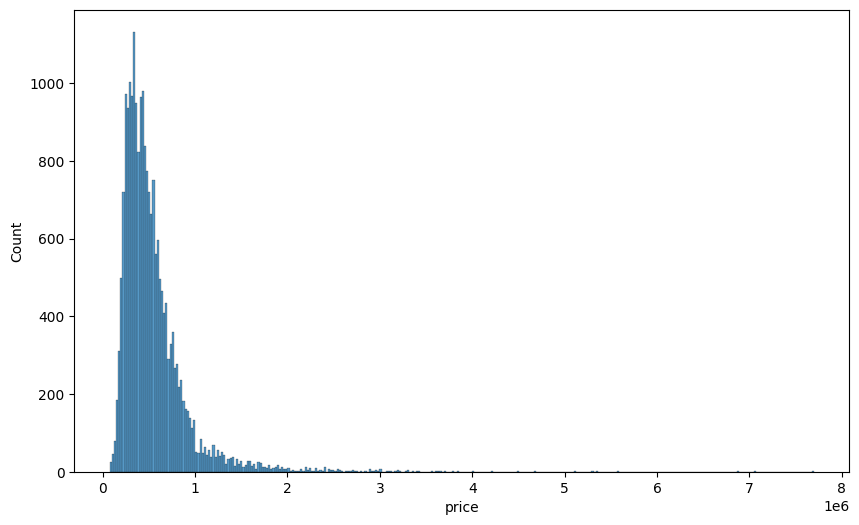

In [22]:
plt.figure(figsize=(10,6))
sns.histplot(x=df['price'])

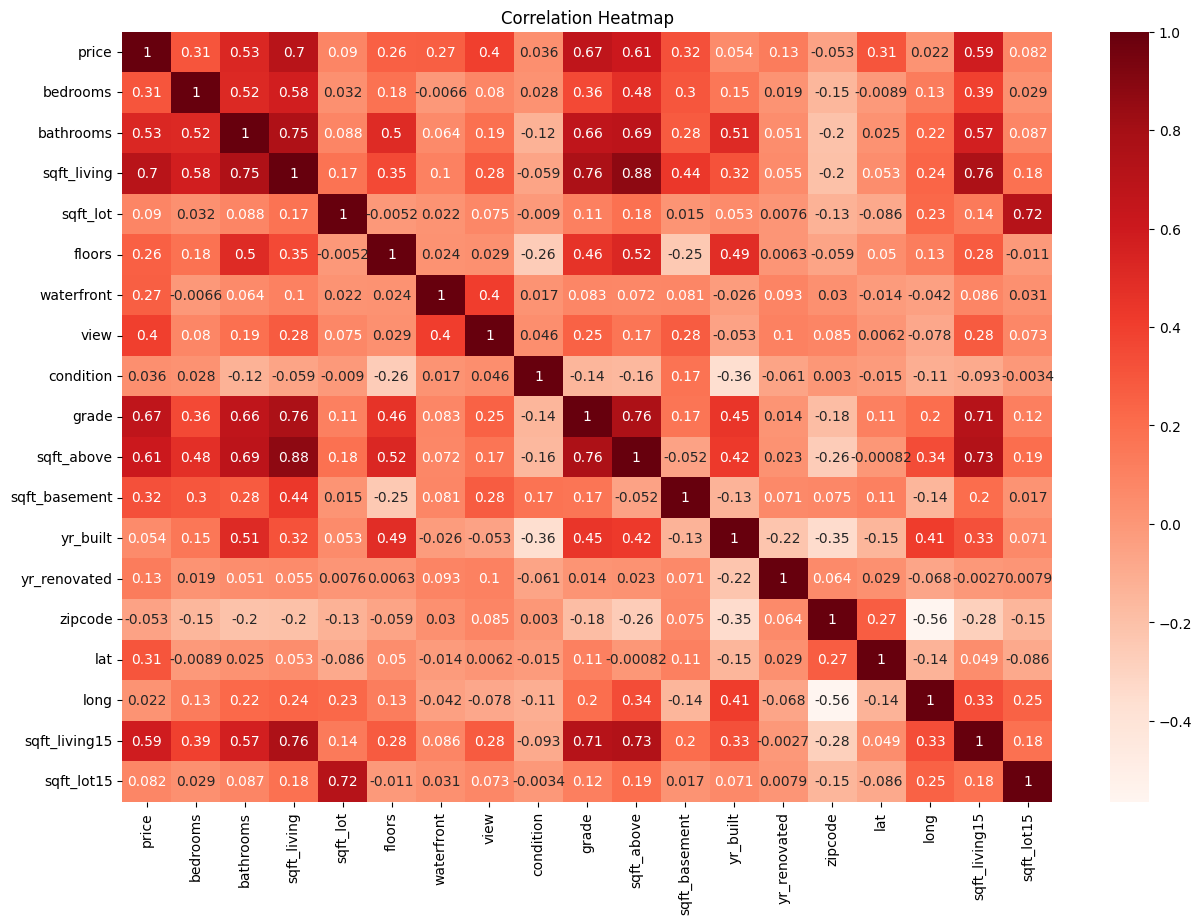

In [23]:
info = df
correlationMatrix = info.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlationMatrix, annot=True, cmap='Reds')
plt.title('Correlation Heatmap')
plt.show()

## TRAINING THE DATA

In [31]:
from sklearn.metrics import  confusion_matrix

In [57]:
def evaluate(sk_model, x_test, y_test):
    eval_acc = sk_model.score(x_test, y_test)
    predictions = sk_model.predict(x_test)
    MSE=mean_squared_error(y_test,predictions)
    RMSE=np.sqrt(mean_squared_error(y_test,predictions))
    mlflow.log_metric("eval_acc", eval_acc) # nous avons fait la même chose pour l'accuracy de test (evaluation)
    mlflow.log_metric("MSE", MSE)# 
    mlflow.log_metric("RMSE", RMSE)#
    print(f"MSE Score: {MSE:.3%}")
    print(f"Eval Accuracy: {eval_acc:.3%}")
 
    

In [58]:
mlflow.set_experiment("house_price_experiment")
def train_model(model, X_train, y_train, X_test, y_test, run_name):
    print(model)
    with mlflow.start_run(run_name=run_name):

        # Log parameters
        mlflow.log_param("model_type", model.__class__.__name__)

        # Fit the model
        model.fit(X_train, y_train)

        # Make metrics
        evaluate(model,X_test, y_test)

        # Log the model
        mlflow.sklearn.log_model(model, "model")


2023/11/27 11:00:18 INFO mlflow.tracking.fluent: Experiment with name 'house_price_experiment' does not exist. Creating a new experiment.


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [49]:

X = df.drop(columns='price')
y = df['price']

In [80]:
#  scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [81]:
X_train , X_test , y_train , y_test = train_test_split(X ,y ,test_size=0.2 , random_state=42 )
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (17290, 18)
y_train shape: (17290,)
X_test shape: (4323, 18)
y_test shape: (4323,)


#### train models

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR


In [82]:
# Train 5 models
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    SVR(),
    GradientBoostingRegressor()
]

In [83]:
for i, model in enumerate(models):
    run_name = f"{model}_run_{i+1}"

    train_model(model, X_train, y_train, X_test, y_test, run_name)

LinearRegression()
MSE Score: 4517304613278.838%
Eval Accuracy: 70.119%


c:\Users\Mohamed CHAFIQ\AppData\Local\Programs\Python\Python310\lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
c:\Users\Mohamed CHAFIQ\AppData\Local\Programs\Python\Python310\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


DecisionTreeRegressor()
MSE Score: 4206790914733.044%
Eval Accuracy: 72.173%


c:\Users\Mohamed CHAFIQ\AppData\Local\Programs\Python\Python310\lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
c:\Users\Mohamed CHAFIQ\AppData\Local\Programs\Python\Python310\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


RandomForestRegressor()
MSE Score: 2076502159625.212%
Eval Accuracy: 86.264%


c:\Users\Mohamed CHAFIQ\AppData\Local\Programs\Python\Python310\lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
c:\Users\Mohamed CHAFIQ\AppData\Local\Programs\Python\Python310\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


SVR()
MSE Score: 16103694702310.217%
Eval Accuracy: -6.522%


c:\Users\Mohamed CHAFIQ\AppData\Local\Programs\Python\Python310\lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
c:\Users\Mohamed CHAFIQ\AppData\Local\Programs\Python\Python310\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


GradientBoostingRegressor()
MSE Score: 2194971840929.342%
Eval Accuracy: 85.481%


c:\Users\Mohamed CHAFIQ\AppData\Local\Programs\Python\Python310\lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
c:\Users\Mohamed CHAFIQ\AppData\Local\Programs\Python\Python310\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


![Screenshot (43).png](<attachment:Screenshot (43).png>)

In [84]:
# Find the best model
best_run = mlflow.search_runs(order_by=["metrics.mse"]).iloc[0]
best_run_id = best_run.run_id

# Retrieve the artifact URI for the 'model' directory
best_model_uri = mlflow.get_run(run_id=best_run_id).info.artifact_uri + "/model"


In [85]:
best_run_id

'5616b957ab4c43a583fddef14adb69f2'

#### save the best model

In [88]:
import pickle
import onnx
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

In [90]:
# Save the best model in ONNX format
best_model = mlflow.sklearn.load_model(best_model_uri)
initial_type = [('float_input',FloatTensorType([None, X_train.shape[1]]))]
onnx_model = convert_sklearn(best_model, initial_types=initial_type)
onnx.save_model(onnx_model, "../models/best_model.onnx")


In [93]:
# Save preprocessing transformations using pickle
with open("../models/preprocessing_transformations.pkl", "wb") as f:
    pickle.dump(scaler, f)
    # Add other transformers as needed